## Analisis Sentimen Review Makanan

Kode ini mencoba untuk mengeksplorasi dan membandingkan tiga teknik berbeda:

- <b>VADER (Valence Aware Dictionary and sEntiment Reasoner)</b> – Pendekatan berbasis leksikon yang cocok untuk teks pendek dan informal.

- <b>Model RoBERTa Pretrained</b> – Model deep learning berbasis transformer yang lebih memahami konteks.

- <b>Hugging Face Pipeline</b> – Metode yang lebih sederhana untuk mengimplementasikan model NLP dengan mudah.

# Step 0. Membaca Data dan mengkonfigurasikan NLTK

In [112]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [113]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [115]:
# Read in data
df = pd.read_csv('input/Reviews.csv')
print(df.shape)

(568454, 10)


In [116]:
df = df.head(500)

In [117]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [118]:
df.shape

(500, 10)

In [119]:
df['Score'].value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

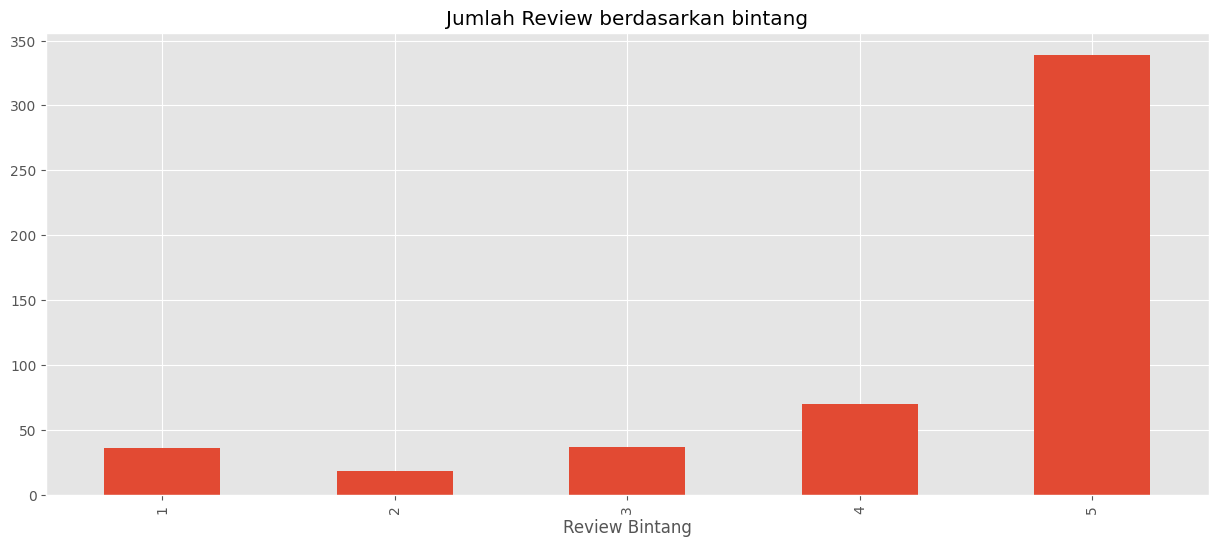

In [120]:
plotbar = df['Score'].value_counts().sort_index().plot(
    kind='bar',
    title='Jumlah Review berdasarkan bintang',
    figsize=(15,6)
)

plotbar.set_xlabel('Review Bintang')
plt.show()

berdasarkan grafik tersebut dari 500 baris data pada dataset, skor 5 memiliki frekuensi tertinggi, dibandingkan skor lainnya

## Contoh Preprocessing pada NLP

In [159]:
contoh_kalimat = df['Text'][50]
print(contoh_kalimat)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


<h1>TOKENIZING</h1>

<b>1. Install model tokenizing

In [122]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

<b>2. Lakukan word tokenizing pada kalimat atau korpus

In [123]:
import nltk
nltk.download('all')



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Heaven\AppData\Roaming\nltk_data

True

In [124]:
tokens = nltk.word_tokenize(contoh_kalimat)
tokens[0:10]


['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

<b>3. POS Tagging → Menentukan jenis kata

In [125]:
# Unduh model POS tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Heaven\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Tag	Deskripsi	Contoh Kata<br>
CC	Coordinating conjunction	and, but, or<br>
CD	Cardinal number	one, two, 100<br>
DT	Determiner	the, a, an<br>
EX	Existential there	there<br>
FW	Foreign word	merci, pizza<br>
IN	Preposition/Subordinating conjunction	in, on, after<br>
JJ	Adjective	happy, large<br>
JJR	Adjective, comparative	bigger, faster<br>
JJS	Adjective, superlative	biggest, fastest<br>
LS	List item marker	1), A)<br>
MD	Modal verb	can, will, must<br>
NN	Noun, singular	dog, book, car<br>
NNS	Noun, plural	dogs, books<br>
NNP	Proper noun, singular	John, Google<br>
NNPS	Proper noun, plural	Americans, Sundays<br>
PDT	Predeterminer	all, both, many<br>
POS	Possessive ending	’s, ’<br>
PRP	Personal pronoun	I, you, he, she<br>
PRP$	Possessive pronoun	my, your, his<br>
RB	Adverb	quickly, never<br>
RBR	Adverb, comparative	faster, better<br>
RBS	Adverb, superlative	fastest, best<br>
RP	Particle	up, off, out<br>
SYM	Symbol	$, %, & <br>


TO	to (as a preposition)	to<br>
UH	Interjection	oh, wow, ugh<br>
VB	Verb, base form	run, eat, sleep<br>
VBD	Verb, past tense	ran, ate, slept<br>
VBG	Verb, gerund/present participle	running, eating<br>
VBN	Verb, past participle	eaten, gone<br>
VBP	Verb, non-3rd person singular present	run, eat<br>
VBZ	Verb, 3rd person singular present	runs, eats<br>
WDT	Wh-determiner	which, that<br>
WP	Wh-pronoun	who, what<br>
WP$	Possessive wh-pronoun	whose<br>
WRB	Wh-adverb	where, when<br>


In [126]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

<b> 4. Melakukan Named Entity Recognition (NER), yaitu mendeteksi nama entitas dalam suatu teks (misalnya nama orang, organisasi, lokasi, dll.).

In [127]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# Step 1. Mengimplementasikan Teknik Vader Untuk Analisis Sentiment



vAder merupakan Model NLP dengan <b> Rule-based / Lexicon-based (Paling Sederhana) </b>

Contoh: VADER, SentiWordNet, AFINN
Berdasarkan kamus kata-kata sentimen yang sudah diberi skor positif/negatif.
Tidak belajar dari data baru, hanya mencocokkan kata dengan skor yang sudah ada.
Contoh VADER:
"good" (+1.9), "bad" (-2.5), "happy" (+2.3)
"I love this movie!" → Skor positif tinggi

e.

<b>1. Mendefinisikan SentimentIntensityAnalyzer

In [160]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

<b>2.polarity_scores() memberikan skor positif, negatif, netral, dan compound.

Apa Itu Skor compound dalam VADER?
compound adalah skor sentimen keseluruhan yang dihitung sebagai nilai agregat dari skor positif (pos), negatif (neg), dan netral (neu) dalam teks.

Ciri-ciri skor compound:
✅ Berkisar antara -1 hingga +1
✅ Interpretasi:

Lebih dari 0 → Sentimen positif <br>
Kurang dari 0 → Sentimen negatif<br>
Mendekati 0 → Sentimen netral<br>


In [161]:
sia.polarity_scores('I am feels Amazing!')

{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'compound': 0.6239}

In [130]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [162]:
print(contoh_kalimat)
sia.polarity_scores(contoh_kalimat)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

<b>3.jalankan polarity_scores() untuk keseluruhan data.

In [163]:
from tqdm import tqdm


In [133]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 500/500 [00:00<00:00, 1854.99it/s]


In [134]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [135]:
vaders = pd.DataFrame(res).T #T for tranpose
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [136]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [137]:
vaders.shape

(500, 14)

<b>4. Memvisualisasikan nilai compound yang didapatkan dari metode vader

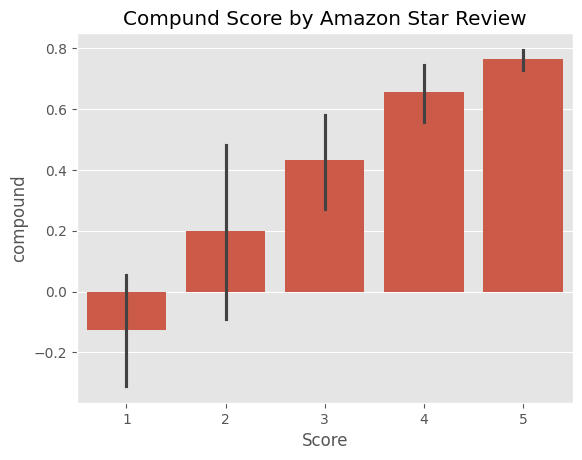

In [138]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

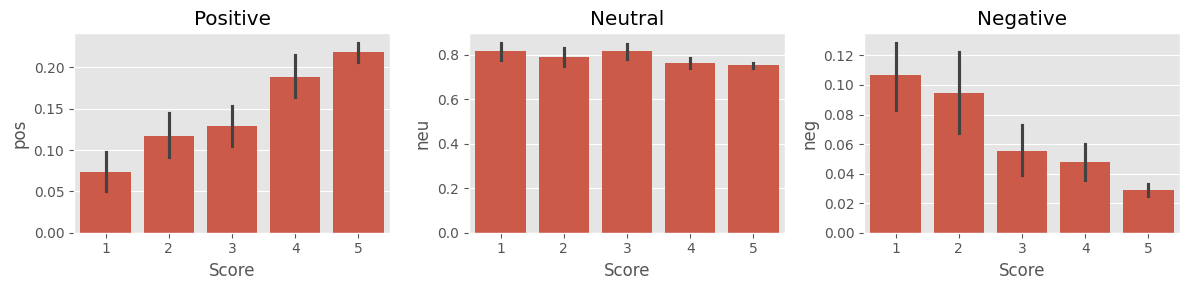

In [139]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 2. Mengimplementasikan Analisis Sentimen dengan Roberta Pretrained Model



RoBERTa (Robustly optimized BERT approach) adalah model NLP yang dikembangkan oleh Facebook AI sebagai perbaikan dari BERT. Model ini menggunakan pendekatan unsupervised learning pada jumlah data yang lebih besar dengan teknik pelatihan yang lebih optimal.

Apa Itu RoBERTa?
RoBERTa adalah versi yang lebih kuat dari BERT, dengan perbedaan utama:

Lebih Banyak Data → RoBERTa dilatih dengan 10x lebih banyak data daripada BERT.
Tanpa NSP (Next Sentence Prediction) → RoBERTa menghapus tugas NSP yang ada di BERT karena dianggap tidak terlalu berguna.
Lebih Banyak Epochs → RoBERTa melakukan training lebih lama pada data yang lebih besar.
Batch Size Lebih Besar → RoBERTa menggunakan batch size lebih besar untuk meningkatkan generalisasi model.


Hugging Face adalah perusahaan yang menyediakan berbagai alat dan pustaka untuk Natural Language Processing (NLP) berbasis Transformer. Salah satu pustaka terkenalnya adalah 🤗 transformers, yang memungkinkan kita untuk dengan mudah menggunakan berbagai model berbasis Transformer seperti BERT, GPT, RoBERTa, T5, dll.



In [140]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install scipy


Note: you may need to restart the kernel to use updated packages.


<b>1. Mengimpor Autotokenizer, Automodel , dan fungsi aktivasi dari library Transformer

In [142]:
from transformers import AutoTokenizer # AutoTokenizer adalah tokenizer otomatis dari pustaka transformers.
from transformers import AutoModelForSequenceClassification #AutoModelForSequenceClassification adalah model Transformer yang sudah dilatih khusus untuk klasifikasi teks.
from scipy.special import softmax #Softmax adalah fungsi aktivasi yang mengubah skor logit menjadi probabilitas.

In [143]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

<b> MODEL = "cardiffnlp/twitter-roberta-base-sentiment"</b>

Model ini adalah RoBERTa yang telah dilatih oleh Cardiff NLP untuk analisis sentimen Twitter.
Model ini dapat mengklasifikasikan teks menjadi negatif, netral, atau positif.<br>

<b>AutoTokenizer.from_pretrained(MODEL)</b>

Memuat tokenizer yang sesuai dengan model.
Tokenizer mengubah teks menjadi token yang bisa dipahami oleh model.<br>

<b>AutoModelForSequenceClassification.from_pretrained(MODEL)</b>

Memuat model RoBERTa yang sudah dilatih untuk klasifikasi sentimen.
Model ini akan menerima input dari tokenizer dan menghasilkan skor untuk setiap kelas sentimen.


In [145]:
# Run for Roberta Model
encoded_text = tokenizer(contoh_kalimat, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687466), 'roberta_pos': np.float32(0.0029573692)}


<b>2. Mendefinisikan fungsi untuk menentukan Polarity Scores dari data

In [146]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

<b>3. Mengimplementasikan ke keseluruhan data

In [147]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

 17%|█▋        | 84/500 [00:06<00:26, 15.69it/s]

Broke for id 83


 38%|███▊      | 188/500 [00:14<00:19, 16.09it/s]

Broke for id 187


100%|██████████| 500/500 [00:38<00:00, 12.96it/s]


In [148]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [165]:
results_df 

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
494,497,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
495,498,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
496,499,0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


## Compare Scores between models

In [149]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

# Step 3. Melihat Perbandingan antara teknik VADER dan ROBERTA

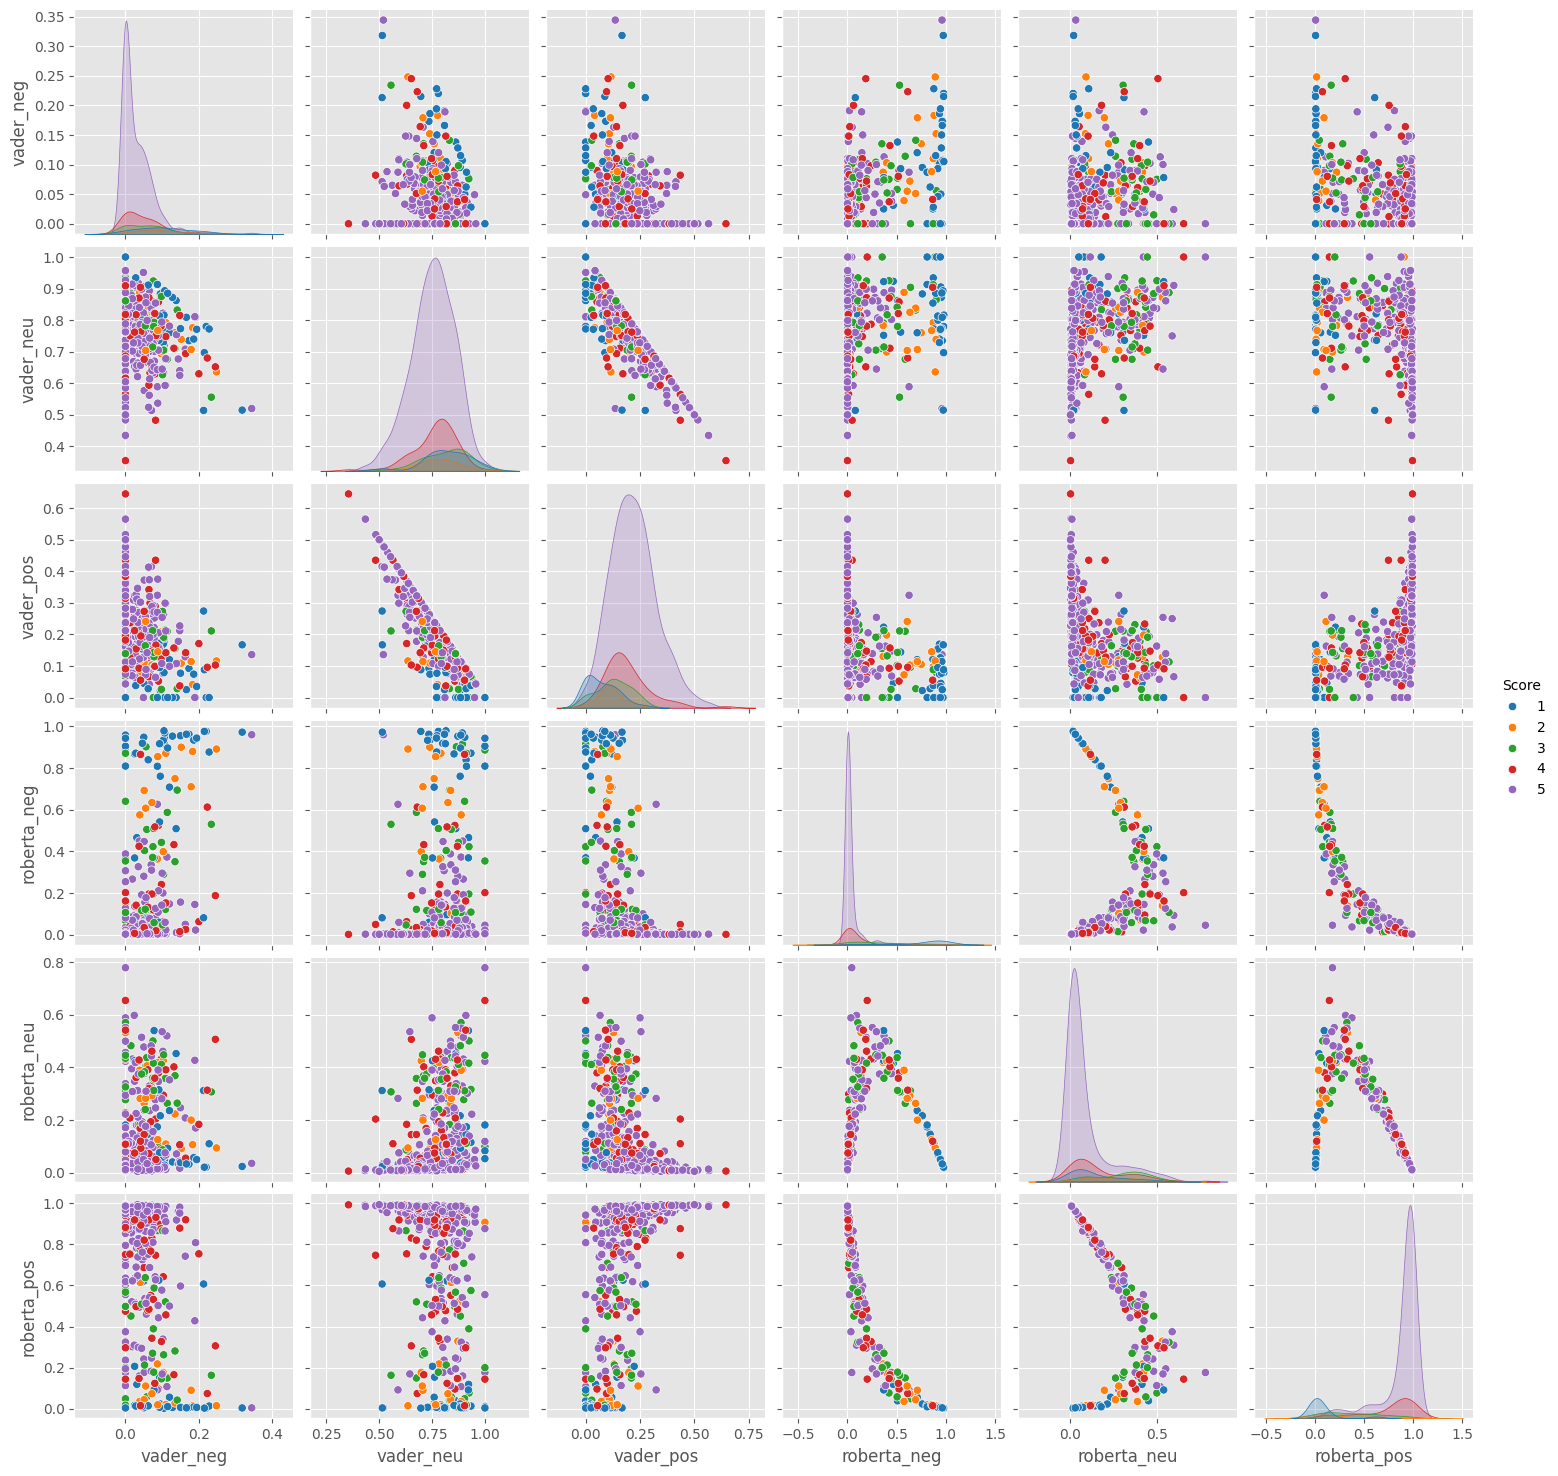

In [150]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

- VADER memiliki distribusi skor yang lebih merata antara negatif (vader_neg), netral (vader_neu), dan positif (vader_pos).
- RoBERTa menunjukkan kecenderungan yang lebih ekstrem, misalnya:
   - roberta_neg memiliki distribusi yang lebih sempit dan terkonsentrasi.
    -  roberta_pos banyak berkumpul di sekitar skor tinggi (mendekati 1).
    - roberta_neu cenderung lebih rendah dibandingkan vader_neu.
- Hal ini menunjukkan bahwa RoBERTa lebih yakin dalam menentukan sentimen negatif atau positif dibandingkan VADER, yang lebih sering memberikan skor netral.

# Mencoba Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [152]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [153]:
sent_pipeline('I love Amazone!')

[{'label': 'POSITIVE', 'score': 0.9998214840888977}]

In [154]:
sent_pipeline('I HATE YOUU!')

[{'label': 'NEGATIVE', 'score': 0.9979594945907593}]

In [158]:
sent_pipeline('i love how ugly you are')

[{'label': 'NEGATIVE', 'score': 0.9931533336639404}]